<a href="https://colab.research.google.com/github/kohyouseob/Python_ML/blob/main/Ch_5_p333_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores : [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.420


In [2]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRFRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.420
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269
[13:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRFRegressor  #####
 5 교차 검증의 평균 RMSE : 4.922
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646


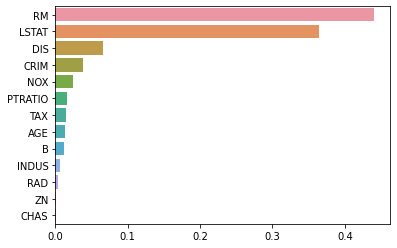

In [10]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


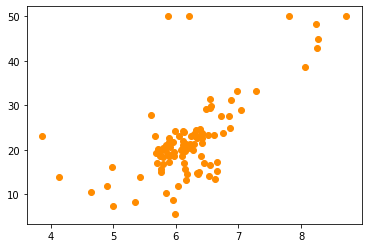

In [13]:
import matplotlib.pyplot as plt

boston_df_sample = boston_df[['RM', 'PRICE']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c="darkorange")

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = boston_df_sample['RM'].values.reshape(-1, 1)
y_target = boston_df_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

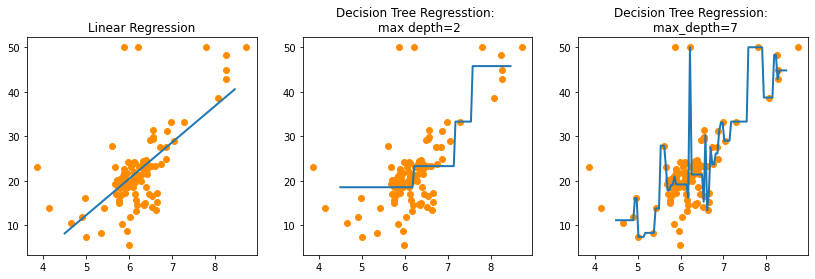

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 외귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regresstion: \n max depth=2')
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)